In [1]:
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
import tensorflow as tf

from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
### load data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [5]:
print(len(X_train))
X_train[444]


60000


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  14, 116, 137, 251, 178,  15,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

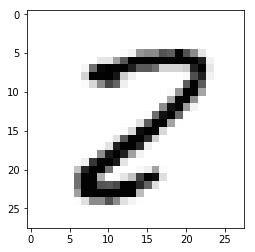

In [24]:
plt.imshow(X_test[444], cmap="Greys")

In [8]:
#### paremeters
Y_train[100]   
X1_train = X_train.reshape(60000, 784) #flatten    
X1_test = X_test.reshape(10000, 784) #flatten   

classes = 10   # results= 10 classes

Y1_train = np_utils.to_categorical(Y_train, classes)     
Y1_test = np_utils.to_categorical(Y_test, classes)

input_size = 784
batch_size = 100     # try 100 and gradient descent
hidden_neurons = 100    # nnumber neurons

In [8]:
# look one example:
Y1_test[100]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [9]:
 


model = Sequential()     # model
### first layers
model.add(Dense(hidden_neurons, input_dim=784)) 
model.add(Activation('sigmoid'))  
### seconds layers
model.add(Dense(classes, input_dim=hidden_neurons)) 


## change to probabilities
model.add(Activation('softmax'))

### detail: loss function and optimizer
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')
#### start to train
model.fit(X1_train, Y1_train, batch_size=batch_size, epochs=30, verbose=1)

Epoch 1/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.9092 - acc: 0.7710
Epoch 2/30
60000/60000 [==============================] - 1s 23us/step - loss: 0.4721 - acc: 0.8845
Epoch 3/30
60000/60000 [==============================] - 1s 23us/step - loss: 0.3855 - acc: 0.9027
Epoch 4/30
60000/60000 [==============================] - 1s 24us/step - loss: 0.3410 - acc: 0.9109
Epoch 5/30
60000/60000 [==============================] - 1s 24us/step - loss: 0.3121 - acc: 0.9165
Epoch 6/30
60000/60000 [==============================] - 1s 23us/step - loss: 0.2905 - acc: 0.9224
Epoch 7/30
60000/60000 [==============================] - 2s 25us/step - loss: 0.2731 - acc: 0.9265
Epoch 8/30
60000/60000 [==============================] - 2s 26us/step - loss: 0.2595 - acc: 0.9290
Epoch 9/30
60000/60000 [==============================] - 1s 25us/step - loss: 0.2487 - acc: 0.9309
Epoch 10/30
60000/60000 [==============================] - 1s 23us/step - loss: 0.2402 - acc: 0.9339

In [10]:
prediction = model.predict_classes(X1_test)

def plot_images_labels_prediction(images, labels, prediction, idx, num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = "label=" + str(labels[idx])
        if len(prediction) > 0:
            title += ", predict=" + str(prediction[idx])
                
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([]);ax.set_yticks([])
        idx += 1
    plt.show()

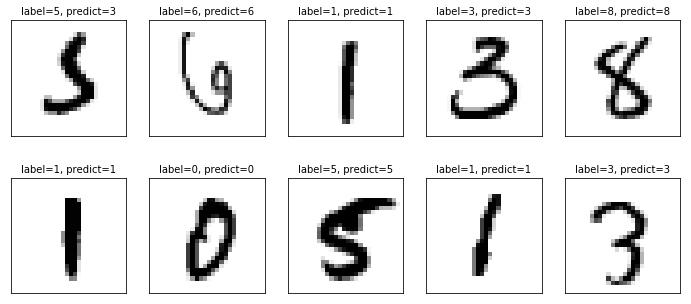

In [11]:
plot_images_labels_prediction(X_test, Y_test, prediction, idx=340)

In [12]:
# scorers
score = model.evaluate(X1_test, Y1_test, verbose=1)
print('Test accuracy:', score[1]) 
from keras.models import load_model

model.save('my_model.h5')

10000/10000 [==============================] - 0s 27us/step
Test accuracy: 0.9527


9


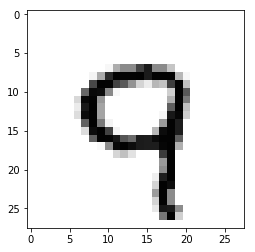

In [26]:
## check specific example
print(np.array(prediction.tolist())[454])
plt.imshow(X_test[454], cmap="Greys")